In [ ]:
# Step 1: Import libraries
import os
import shutil
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from tqdm import tqdm

# Step 2: Mount Google Drive if using Drive (optional)
from google.colab import drive
drive.mount('/content/drive')

# Step 3: Define paths
input_folder  = '/content/drive/MyDrive/undersampling/denoised_normal'   # your folder of 2000 preprocessed images
output_folder = '/content/drive/MyDrive/undersampling/undersampled_images' # output folder for 500 images
n_clusters    = 500

# Step 4: Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Step 5: Collect image file paths
file_paths = [
    os.path.join(input_folder, fname)
    for fname in os.listdir(input_folder)
    if fname.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))
]

# Step 6: Load and flatten images (grayscale assumed)
images = []
print("Loading and flattening images...")
for fp in tqdm(file_paths):
    img = Image.open(fp).convert("L")  # ensure grayscale
    arr = np.array(img).flatten()
    images.append(arr)

images = np.stack(images, axis=0)  # shape: (N, H*W)

# Step 7: Apply PCA for dimensionality reduction
print("Applying PCA...")
pca = PCA(n_components=50, random_state=42)
reduced_images = pca.fit_transform(images)  # shape: (N, 50)

# Step 8: Apply KMeans clustering
print("Clustering with KMeans...")
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
labels = kmeans.fit_predict(reduced_images)
centroids = kmeans.cluster_centers_

# Step 9: Select closest image to each cluster centroid
print("Selecting representative images...")
selected_indices = []
for cluster_id in range(n_clusters):
    idxs = np.where(labels == cluster_id)[0]
    cluster_feats = reduced_images[idxs]
    centroid = centroids[cluster_id]
    distances = np.linalg.norm(cluster_feats - centroid, axis=1)
    chosen = idxs[np.argmin(distances)]
    selected_indices.append(chosen)

# Step 10: Copy selected original images to output folder
print("Copying selected images to output folder...")
for idx in selected_indices:
    src = file_paths[idx]
    dst = os.path.join(output_folder, os.path.basename(src))
    shutil.copy(src, dst)

print(f"\n✅ Undersampling complete: {len(selected_indices)} images saved to:\n{output_folder}")


Mounted at /content/drive
Loading and flattening images...


100%|██████████| 2132/2132 [00:43<00:00, 48.81it/s] 


Applying PCA...
Clustering with KMeans...
Selecting representative images...
Copying selected images to output folder...

✅ Undersampling complete: 500 images saved to:
/content/drive/MyDrive/undersampling/undersampled_images


In [ ]:
import matplotlib.pyplot as plt


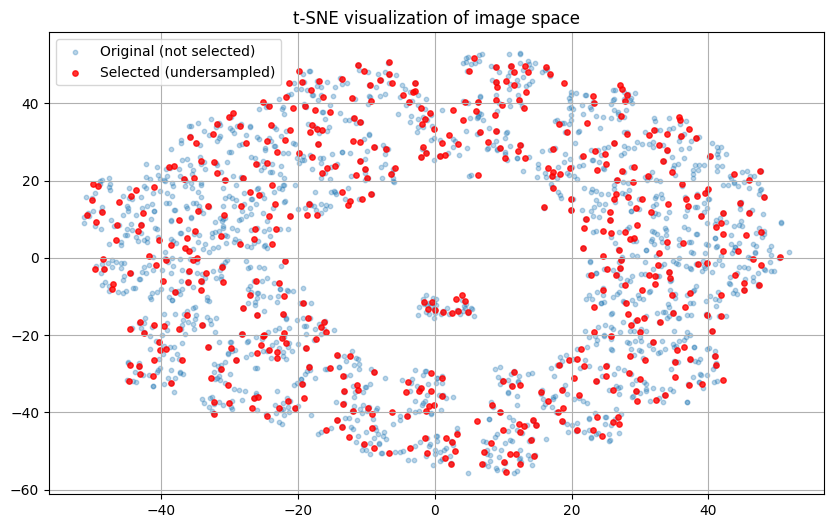

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# sample_indices = selected image indices (500)
# images = numpy array of all 2000 images, already flattened

# Get remaining (non-selected) indices
remaining_indices = list(set(range(len(images))) - set(selected_indices))

# t-SNE projection to 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
reduced_tsne = tsne.fit_transform(images)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(reduced_tsne[remaining_indices, 0], reduced_tsne[remaining_indices, 1],
            s=10, label='Original (not selected)', alpha=0.3)
plt.scatter(reduced_tsne[selected_indices, 0], reduced_tsne[selected_indices, 1],
            s=15, label='Selected (undersampled)', alpha=0.8, c='red')
plt.legend()
plt.title("t-SNE visualization of image space")
plt.grid(True)
plt.show()


In [ ]:
# Step 3: Define paths
input_folder  = '/content/drive/MyDrive/undersampling/denoised_normal_yellow'   # your folder of 2000 preprocessed images
output_folder = '/content/drive/MyDrive/undersampling/undersampled_images_yellow' # output folder for 500 images
n_clusters    = 500

# Step 4: Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Step 5: Collect image file paths
file_paths = [
    os.path.join(input_folder, fname)
    for fname in os.listdir(input_folder)
    if fname.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))
]

# Step 6: Load and flatten images (grayscale assumed)
images = []
print("Loading and flattening images...")
for fp in tqdm(file_paths):
    img = Image.open(fp).convert("L")  # ensure grayscale
    arr = np.array(img).flatten()
    images.append(arr)

images = np.stack(images, axis=0)  # shape: (N, H*W)

# Step 7: Apply PCA for dimensionality reduction
print("Applying PCA...")
pca = PCA(n_components=50, random_state=42)
reduced_images = pca.fit_transform(images)  # shape: (N, 50)

# Step 8: Apply KMeans clustering
print("Clustering with KMeans...")
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
labels = kmeans.fit_predict(reduced_images)
centroids = kmeans.cluster_centers_

# Step 9: Select closest image to each cluster centroid
print("Selecting representative images...")
selected_indices = []
for cluster_id in range(n_clusters):
    idxs = np.where(labels == cluster_id)[0]
    cluster_feats = reduced_images[idxs]
    centroid = centroids[cluster_id]
    distances = np.linalg.norm(cluster_feats - centroid, axis=1)
    chosen = idxs[np.argmin(distances)]
    selected_indices.append(chosen)

# Step 10: Copy selected original images to output folder
print("Copying selected images to output folder...")
for idx in selected_indices:
    src = file_paths[idx]
    dst = os.path.join(output_folder, os.path.basename(src))
    shutil.copy(src, dst)

print(f"\n✅ Undersampling complete: {len(selected_indices)} images saved to:\n{output_folder}")


Loading and flattening images...


100%|██████████| 940/940 [00:16<00:00, 55.72it/s] 


Applying PCA...
Clustering with KMeans...
Selecting representative images...
Copying selected images to output folder...

✅ Undersampling complete: 500 images saved to:
/content/drive/MyDrive/undersampling/undersampled_images_yellow


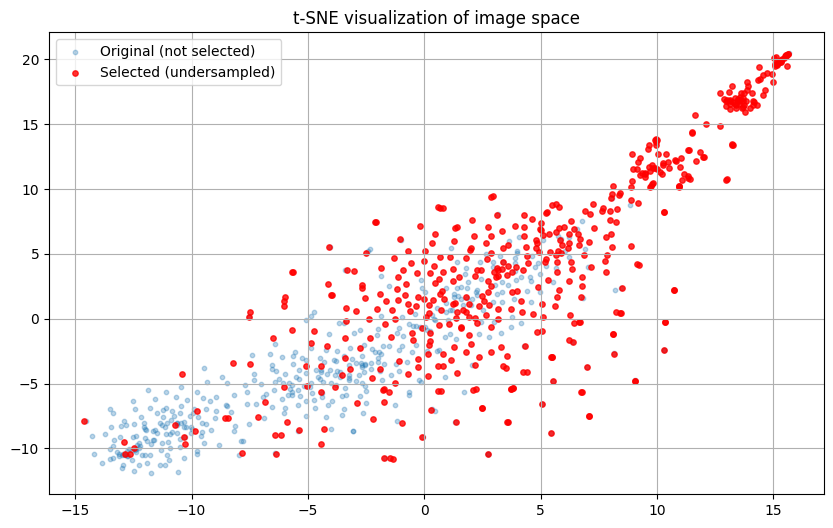

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# sample_indices = selected image indices (500)
# images = numpy array of all 2000 images, already flattened

# Get remaining (non-selected) indices
remaining_indices = list(set(range(len(images))) - set(selected_indices))

# t-SNE projection to 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
reduced_tsne = tsne.fit_transform(images)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(reduced_tsne[remaining_indices, 0], reduced_tsne[remaining_indices, 1],
            s=10, label='Original (not selected)', alpha=0.3)
plt.scatter(reduced_tsne[selected_indices, 0], reduced_tsne[selected_indices, 1],
            s=15, label='Selected (undersampled)', alpha=0.8, c='red')
plt.legend()
plt.title("t-SNE visualization of image space")
plt.grid(True)
plt.show()
